# Conditional Agent

In [29]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [45]:
class StateAgent(TypedDict):
    num1: int
    num2: int
    num3: int
    num4: int
    operation: str
    operation2: str
    final: int
    final2: int
    answer: str

In [58]:
def additional(state: StateAgent) ->StateAgent:
    state['final'] = state['num1'] + state['num2']

    return state

def subtraction(state: StateAgent) ->StateAgent:
    state['final'] = state['num1'] - state['num2']

    return state

def conditional(state: StateAgent) -> StateAgent:

    if state['operation']=='+':
        return "additional_operation"
    elif state['operation']=='-':
        return "subtraction_operation"
        

In [59]:
def additional2(state: StateAgent) ->StateAgent:
    state['final2'] = state['num3'] + state['num4']

    return state

def subtraction2(state: StateAgent) ->StateAgent:
    state['final2'] = state['num3'] - state['num4']

    return state

def conditional2(state: StateAgent) -> StateAgent:

    if state['operation']=='+':
        return "additional_operation2"
    elif state['operation']=='-':
        return "subtraction_operation2"
        

In [60]:
graph = StateGraph(StateAgent)

graph.add_node('additional', additional)
graph.add_node('subtraction', subtraction)
graph.add_node('router', lambda state:state)

graph.add_node('additional2', additional2)
graph.add_node('subtraction2', subtraction2)
graph.add_node('router2', lambda state: state)

graph.add_edge(START, 'router')

graph.add_conditional_edges(
    'router',
    conditional,

    {
        #edge:node
        'additional_operation': 'additional',
        'subtraction_operation':'subtraction'
    }
)

graph.add_conditional_edges(
    'router2',
    conditional2,
    {
        #edge:node
        'additional_operation2': 'additional2',
        'subtraction_operation2':'subtraction2'
    }
)
graph.add_edge('additional', 'router2')
graph.add_edge('subtraction', 'router2')

graph.add_edge('additional2', END)
graph.add_edge('subtraction2', END)

In [61]:
app = graph.compile()

result = app.invoke({'num1':10, 'num2':5, 'operation':'-', 'num3':7, 'num4':2, 'operation':'+'})

In [62]:
print(result)

{'num1': 10, 'num2': 5, 'num3': 7, 'num4': 2, 'operation': '+', 'final': 15, 'final2': 9}


In [63]:
result['final']

15

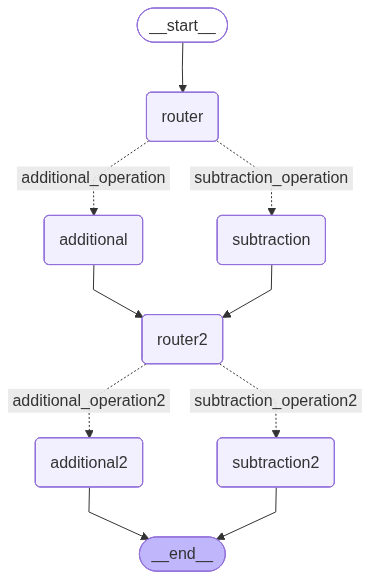

In [64]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))